In [1]:
import geopandas as gpd 
import pandas as pd
import dssg.dataio.osm_data_extraction as ode
import os
from dotenv import load_dotenv
load_dotenv()
import pyreadstat

In [2]:
# Import the voronoi shape of India
import dssg.dataio.osm_to_voronoi_mapping as ovm
data_dir = os.environ.get("DATA_DIR")
india_voronoi_gpd = gpd.read_file(data_dir + "voronoi/IAGE71FL_Voronoi_Clipped/IAGE71FL_Voronoi_Clipped.shp")

In [3]:
india_voronoi_gpd.head()

DHSID  DHSCLUST  ADM1DHS  DHSREGCO     DHSREGNA URBAN_RURA  \
0  IA201400310502  310502.0     31.0     602.0  Thiruvallur          R   
1  IA201400310190  310190.0     31.0     602.0  Thiruvallur          R   
2  IA201400310070  310070.0     31.0     602.0  Thiruvallur          R   
3  IA201400310716  310716.0     31.0     602.0  Thiruvallur          R   
4  IA201400310592  310592.0     31.0     602.0  Thiruvallur          R   

      LATNUM    LONGNUM  ALT_DEM  DATUM   WEIGHT  \
0  13.320202  80.010414     39.0  WGS84  0.04504   
1  13.118380  79.803917     56.0  WGS84  0.04504   
2  13.147002  79.804755     44.0  WGS84  0.04504   
3  13.263585  80.188453     14.0  WGS84  0.04504   
4  13.261215  80.222348     18.0  WGS84  0.04504   

                                            geometry  
0  POLYGON ((79.95699 13.28227, 79.95030 13.37055...  
1  POLYGON ((79.77943 12.97075, 79.71600 12.99485...  
2  POLYGON ((79.83122 13.24096, 79.87546 13.14136...  
3  POLYGON ((80.20192 13.21268, 80.10237 13.25050...  
4  POLYGON ((80.27104 13.24175, 80.20483 13.20947...

In [1]:

india_shape = os.environ.get("DATA_DIR") + "/gadm36_shp/gadm36_IND_2.shp"

NameError: name 'os' is not defined

In [5]:
%%prun -s cumulative -q -l 10 -T ../profile/extract_district_dataframe
import matplotlib.pyplot as plt 
%matplotlib inline
india_gpd = gpd.read_file(india_shape)
#Extract a district from gadm36_IND_2.shp file
araria_gdf = ode.extract_district_dataframe(india_gpd, 'Araria')

 
*** Profile printout saved to text file '../profile/extract_district_dataframe'. 


In [6]:
print(open('../profile/extract_district_dataframe', 'r').read())

         43085 function calls (39448 primitive calls) in 1.387 seconds

   Ordered by: cumulative time
   List reduced from 717 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.387    1.387 {built-in method builtins.exec}
        1    0.000    0.000    1.387    1.387 <string>:1(<module>)
        1    0.001    0.001    1.314    1.314 file.py:66(_read_file)
        1    0.495    0.495    0.760    0.760 geodataframe.py:505(from_features)
        1    0.000    0.000    0.388    0.388 env.py:231(__enter__)
        1    0.019    0.019    0.388    0.388 env.py:279(defenv)
        1    0.306    0.306    0.369    0.369 {method 'start' of 'fiona._env.GDALEnv' objects}
        3    0.000    0.000    0.167    0.056 geodataframe.py:103(__init__)
      666    0.003    0.000    0.133    0.000 geo.py:62(shape)
     1475    0.031    0.000    0.111    0.000 polygon.py:500(geos_polygon_from_py)


In [7]:
%%prun -s cumulative -q -l 10 -T ../profile/extract_district_voronoi_clipped
#Extract the GeoDataFrame of the voronoi clipped to the district boundary
araria_voronoi_gpd_clipped = ovm.extract_district_voronoi_clipped(india_voronoi_gpd, araria_gdf)

 
*** Profile printout saved to text file '../profile/extract_district_voronoi_clipped'. 


In [8]:
print(open('../profile/extract_district_voronoi_clipped', 'r').read())

         61054379 function calls (60252728 primitive calls) in 68.880 seconds

   Ordered by: cumulative time
   List reduced from 1480 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      3/1    0.000    0.000   68.880   68.880 {built-in method builtins.exec}
        1    0.026    0.026   68.880   68.880 <string>:2(<module>)
        1    0.002    0.002   68.835   68.835 osm_to_voronoi_mapping.py:43(extract_district_voronoi_clipped)
        1    0.051    0.051   62.999   62.999 osm_data_extraction.py:56(create_district_knots_and_edges_model)
        1    0.394    0.394   62.776   62.776 graph.py:354(graph_from_polygon)
        2    0.039    0.020   38.037   19.019 truncate.py:120(truncate_graph_polygon)
        2    0.029    0.014   24.032   12.016 utils_geo.py:339(_intersect_index_quadrats)
      629    0.030    0.000   17.761    0.028 geodataframe.py:103(__init__)
      633    0.015    0.000   16.340    0.026 geodataframe.py:201

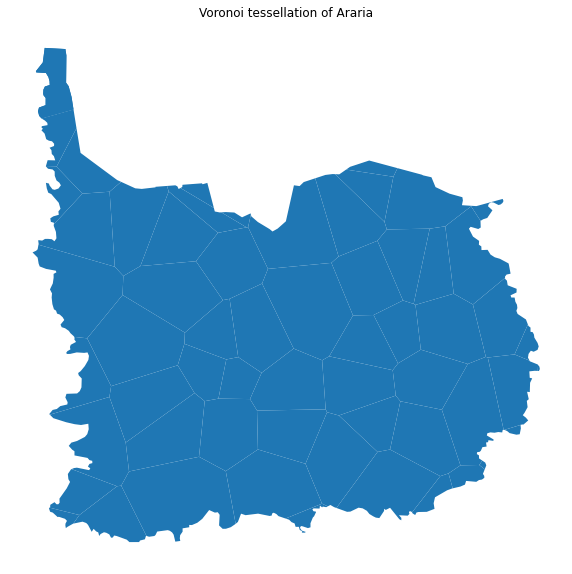

In [9]:
ovm.plot_district_voronoi(araria_voronoi_gpd_clipped, "Araria")

In [10]:
araria_voronoi_gpd_clipped.head()

DHSID  DHSCLUST  ADM1DHS  DHSREGCO DHSREGNA URBAN_RURA  \
24079  IA201400051045   51045.0      5.0     208.0   Supaul          R   
24081  IA201400051659   51659.0      5.0     208.0   Supaul          R   
24099  IA201400050462   50462.0      5.0     208.0   Supaul          R   
24111  IA201400050932   50932.0      5.0     208.0   Supaul          R   
24113  IA201400051032   51032.0      5.0     208.0   Supaul          R   

          LATNUM    LONGNUM  ALT_DEM  DATUM   WEIGHT  \
24079  26.399383  87.052475     73.0  WGS84  0.04504   
24081  26.464088  87.050647     80.0  WGS84  0.04504   
24099  26.525177  87.033421     82.0  WGS84  0.04504   
24111  26.145699  87.065582     58.0  WGS84  0.04504   
24113  26.083933  87.084018     55.0  WGS84  0.04504   

                                                geometry  
24079  MULTIPOLYGON (((87.09631 26.39683, 87.05918 26...  
24081  POLYGON ((87.08863 26.48220, 87.06270 26.43205...  
24099  POLYGON ((87.08476 26.50668, 87.04326 26.49498...  
24111  POLYGON ((87.08554 26.21006, 87.10250 26.20820...  
24113  POLYGON ((87.15693 26.03450, 87.14677 26.01600...

In [ ]:
#%%prun -s cumulative -q -l 10 -T ../profile/extract_district_voronoi
#araria_voronoi_gpd = ovm.extract_district_voronoi(india_voronoi_gpd, araria_gdf)

In [ ]:
#print(open('../profile/extract_district_voronoi', 'r').read())

In [ ]:
#araria_voronoi_gpd.head()

In [ ]:
#ovm.plot_district_voronoi(araria_voronoi_gpd, "Araria")

In [11]:
%%prun -s cumulative -q -l 10 -T ../profile/extract_district_voronoi_wo_clipping
araria_voronoi_joined = ovm.extract_district_voronoi_wo_clipping(india_voronoi_gpd, araria_gdf)

 
*** Profile printout saved to text file '../profile/extract_district_voronoi_wo_clipping'. 


In [12]:
araria_voronoi_joined.head()

DHSID  DHSCLUST  ADM1DHS  DHSREGCO DHSREGNA URBAN_RURA  \
24079  IA201400051045   51045.0      5.0     208.0   Supaul          R   
24081  IA201400051659   51659.0      5.0     208.0   Supaul          R   
24099  IA201400050462   50462.0      5.0     208.0   Supaul          R   
24111  IA201400050932   50932.0      5.0     208.0   Supaul          R   
24113  IA201400051032   51032.0      5.0     208.0   Supaul          R   

          LATNUM    LONGNUM  ALT_DEM  DATUM   WEIGHT  \
24079  26.399383  87.052475     73.0  WGS84  0.04504   
24081  26.464088  87.050647     80.0  WGS84  0.04504   
24099  26.525177  87.033421     82.0  WGS84  0.04504   
24111  26.145699  87.065582     58.0  WGS84  0.04504   
24113  26.083933  87.084018     55.0  WGS84  0.04504   

                                                geometry  index_right  NAME_2  
24079  POLYGON ((87.09631 26.39683, 87.03554 26.33137...           61  Araria  
24081  POLYGON ((87.08912 26.48314, 87.06270 26.43205...           61  Araria  
24099  POLYGON ((87.08567 26.50694, 87.01083 26.48583...           61  Araria  
24111  POLYGON ((87.06560 26.21225, 87.10250 26.20820...           61  Araria  
24113  POLYGON ((87.15693 26.03450, 87.14677 26.01600...           61  Araria

In [13]:
print(open('../profile/extract_district_voronoi_wo_clipping', 'r').read())

         3264283 function calls (3263945 primitive calls) in 5.041 seconds

   Ordered by: cumulative time
   List reduced from 719 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    5.041    5.041 {built-in method builtins.exec}
        1    0.000    0.000    5.041    5.041 <string>:1(<module>)
        1    0.000    0.000    5.041    5.041 osm_to_voronoi_mapping.py:68(extract_district_voronoi_wo_clipping)
        1    0.004    0.004    5.041    5.041 sjoin.py:9(sjoin)
        1    0.000    0.000    4.673    4.673 sjoin.py:146(_geom_predicate_query)
        1    0.113    0.113    4.665    4.665 sindex.py:441(query_bulk)
    28393    0.182    0.000    4.274    0.000 sindex.py:361(query)
    28394    0.077    0.000    2.309    0.000 base.py:473(bounds)
    28394    0.745    0.000    1.991    0.000 coords.py:164(__call__)
    28393    0.056    0.000    1.157    0.000 sindex.py:453(intersection)


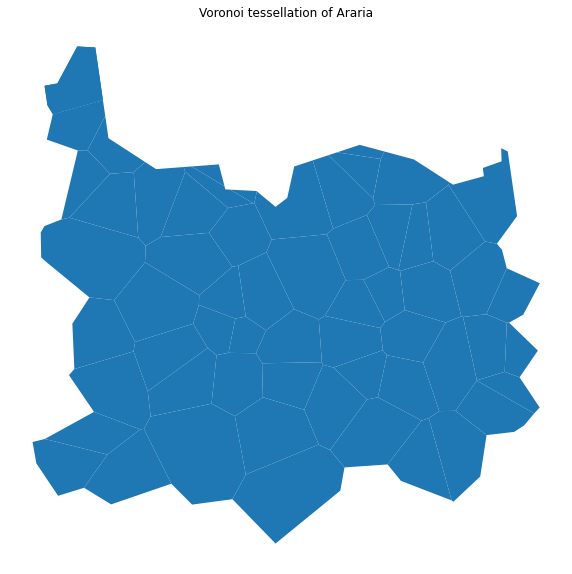

In [14]:

ovm.plot_district_voronoi(araria_voronoi_joined, "Araria")

In [15]:
#Write the district voronoi geodataframe to a file
ovm.write_district_voronoi_to_shapefile(araria_voronoi_joined, os.environ.get("DATA_DIR") + "/voronoi/araria-voronoi.shp")

/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/media/veracrypt1/geospatial/WRI_India_ext/dssg/dataio/osm_to_voronoi_mapping.py:85: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
/media/veracrypt1/geospatial/WRI_India_ext/dssg/dataio/osm_to_voronoi_mapping.py:87: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


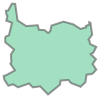

In [16]:
araria_voronoi_joined.unary_union

In [17]:
%%prun -s cumulative -q -l 10 -T ../profile/create_knots_and_edges_from_boundary
# Extract OSM dataframe based on voronoi boundary of the district to prepare to get osm data.
from shapely.geometry import mapping, Polygon
import osmnx as ox 
# Date based extraction of polygon and graph
cs = '[out:json][timeout:180][date:"2021-05-01T00:00:00Z"]'
(araria_voronoi_poly, araria_voronoi_graph) = ode.create_knots_and_edges_from_boundary(araria_voronoi_joined, cs)


 
*** Profile printout saved to text file '../profile/create_knots_and_edges_from_boundary'. 


In [18]:
print(open('../profile/create_knots_and_edges_from_boundary', 'r').read())

         66459997 function calls (65508249 primitive calls) in 76.231 seconds

   Ordered by: cumulative time
   List reduced from 1115 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   76.231   76.231 {built-in method builtins.exec}
        1    0.000    0.000   76.230   76.230 <string>:2(<module>)
        1    0.050    0.050   76.230   76.230 osm_data_extraction.py:65(create_knots_and_edges_from_boundary)
        1    0.621    0.621   76.157   76.157 graph.py:354(graph_from_polygon)
        2    0.042    0.021   48.180   24.090 truncate.py:120(truncate_graph_polygon)
        2    0.035    0.018   28.195   14.097 utils_geo.py:339(_intersect_index_quadrats)
      758    0.033    0.000   21.396    0.028 geodataframe.py:103(__init__)
      762    0.018    0.000   20.281    0.027 geodataframe.py:201(set_geometry)
      748    0.006    0.000   14.532    0.019 generic.py:3591(_take_with_is_copy)
      748    

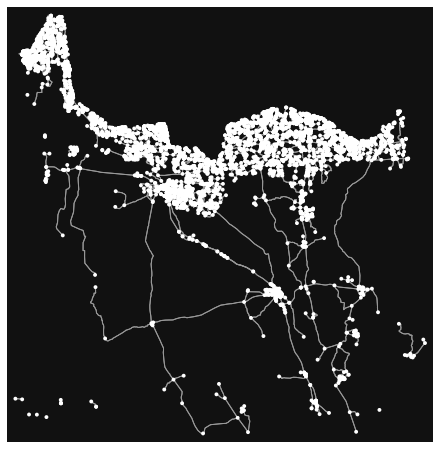

<Figure size 432x288 with 0 Axes>

In [19]:
import osmnx as ox
araria_voronoi_kefig, araria_voronoi_ax = ox.plot_graph(araria_voronoi_graph)
plt.tight_layout()

In [20]:
tags = {'amenity':True, 'building':True, 'emergency':True, 'highway':True, 'footway':True, 'landuse': True, 'water': True}
araria_voronoi_osmdf = ode.extract_osm_csv(araria_voronoi_poly, tags)

In [22]:
araria_voronoi_osmdf.shape

/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(53758, 74)

In [23]:
print(type(araria_voronoi_osmdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [24]:
araria_voronoi_osmdf.to_csv(os.environ.get("OSM_DIR") + "/araria_voronoi_osm.csv")

In [25]:
#How to read the araria_voronoi_osm csv file into a geodataframe
from shapely import wkt
import pandas as pd 
araria_voronoi_osm_df = pd.read_csv(os.environ.get("OSM_DIR") + "/araria_voronoi_osm.csv", low_memory=False)
araria_voronoi_osm_df['geometry'] = araria_voronoi_osm_df['geometry'].apply(wkt.loads)
araria_voronoi_osm_gdf = gpd.GeoDataFrame(araria_voronoi_osm_df, geometry='geometry')

In [35]:
osm_dhs_gdf = araria_voronoi_osm_gdf.copy()

/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# Add new columns to an existing geodataframe
import numpy as np
osm_dhs_gdf['DHSID'] = ""
osm_dhs_gdf['DHSCLUST'] = np.float64(0.0)
# Since district ID remains constant
osm_dhs_gdf['DISTRICTID'] = araria_voronoi_joined.iloc[0]['index_right']


/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check which voronoi cell a point is in point.
def point_check(row, district_voronoi_joined):
    for ind, ro in district_voronoi_joined.iterrows():
        if ro.geometry.contains(row.geometry):
            row['DHSID'] = ro.DHSID
            row['DHSCLUST'] = ro.DHSCLUST 
            break 
    return row 

# Check which voronoi cell a polygon is in 
def polygon_check(row, district_voronoi_joined):
    for ind, ro in district_voronoi_joined.iterrows():
        if ro.geometry.contains(row.geometry.centroid):
            row['DHSID'] = ro.DHSID
            row['DHSCLUST'] = ro.DHSCLUST
            break
    return row

# Check all the voronoi cells a linestring is in

In [32]:
pt_count = 0
poly_count = 0
ln_str_count = 0
mp_count = 0
from tqdm import tqdm
for index, row in tqdm(osm_dhs_gdf.iterrows()):
    if row.geometry.geom_type == 'Point':
        pt_count += 1
        osm_dhs_gdf[index] = point_check(row, )
    elif row.geometry.geom_type == 'Polygon':
        poly_count += 1
        for ind, ro in araria_voronoi_joined.iterrows():
            if ro.geometry.contains(row.geometry.centroid):
                osm_dhs_df = osm_dhs_df.append({'OSMID':row.osmid, 'DHSID':ro.DHSID, 'DHSCLUST': ro.DHSCLUST, 'DISTRICTID': ro.index_right}, ignore_index=True)
                break
    elif row.geometry.geom_type == 'LineString':
        ln_str_count += 1
    elif row.geometry.geom_type == 'MultiPolygon':
        mp_count += 1

print("Total Pts = ", pt_count)
print("Total Polylines = ", ln_str_count)
print("Total polygons = ", poly_count)
print("Total Multi Polygons = ", mp_count)

/media/veracrypt1/.virtualenvs/WRI_WellBeing_Data_Layer-3UVuR9IU/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Total Pts =  45
Total Polylines =  4831
Total polygons =  48880
Total Multi Polygons =  2


In [ ]:
osm_dhs_df.shape

In [ ]:
print(osm_dhs_df)

In [ ]:
osm_dhs_df.to_csv(os.environ.get("OSM_DIR") + "/araria-osm-dhs.csv")

In [ ]:
fig = plt.figure(num=None, figsize=(20,20))
ax = araria_voronoi_joined['geometry'].boundary.plot()
araria_voronoi_osmdf['geometry'].plot(ax=ax, linewidth=1, color='red', markersize=10, marker='o')